In [95]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [101]:
# Creating object for training set DataFrame
Train_DF = pd.read_csv(r"C:\Users\Nikhil\Downloads\train.csv")

# Displaying first 5 rows of the DataFrame
Train_DF.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [103]:
# Getting information regarding the types of data
Train_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       333 non-null    int64  
 1   crim     333 non-null    float64
 2   zn       333 non-null    float64
 3   indus    333 non-null    float64
 4   chas     333 non-null    int64  
 5   nox      333 non-null    float64
 6   rm       333 non-null    float64
 7   age      333 non-null    float64
 8   dis      333 non-null    float64
 9   rad      333 non-null    int64  
 10  tax      333 non-null    int64  
 11  ptratio  333 non-null    float64
 12  black    333 non-null    float64
 13  lstat    333 non-null    float64
 14  medv     333 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 39.2 KB


In [105]:
# Checking if there is any empty row in particular or not
Train_DF.isna().sum()

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [107]:
X0 = Train_DF.iloc[:,1:14].values
Y0 = Train_DF.iloc[:,-1].values
LR0 = LinearRegression()
LR0.fit(X0,Y0)
print("Intercept : ", LR0.intercept_)
print("Slope : ", LR0.coef_)
Y0_pred = LR0.predict(X0)
RMSE0 = np.sqrt(mean_squared_error(Y0,Y0_pred))
print("Root Mean Square Error : ", RMSE0)

Intercept :  34.045437763506115
Slope :  [-5.24893379e-02  4.74448677e-02  5.38552422e-02  3.78486439e+00
 -1.57396571e+01  3.76883175e+00 -4.62660241e-03 -1.54882312e+00
  3.28967093e-01 -1.28664959e-02 -8.56975746e-01  1.16659048e-02
 -6.00315456e-01]
Root Mean Square Error :  4.731759654044982


<Axes: >

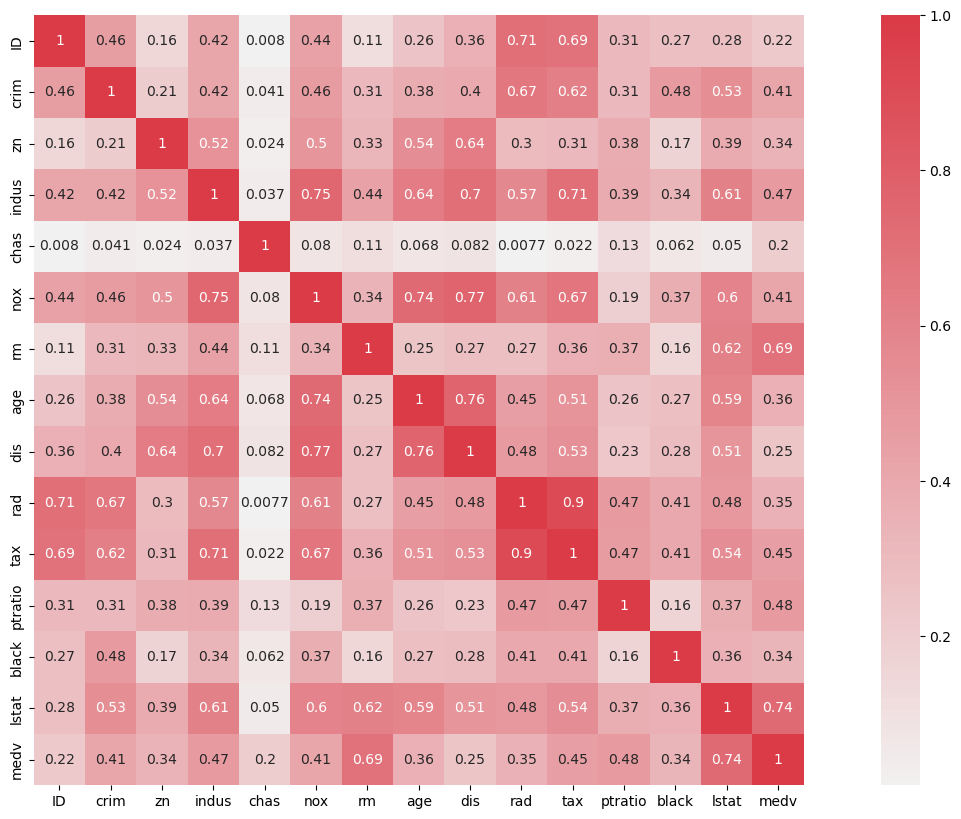

In [109]:
plt.figure(figsize = (20,10))
cmap = sns.diverging_palette(500,10,as_cmap=True)
sns.heatmap(Train_DF.corr().abs(),cmap=cmap,center=0,square=True,annot=True)


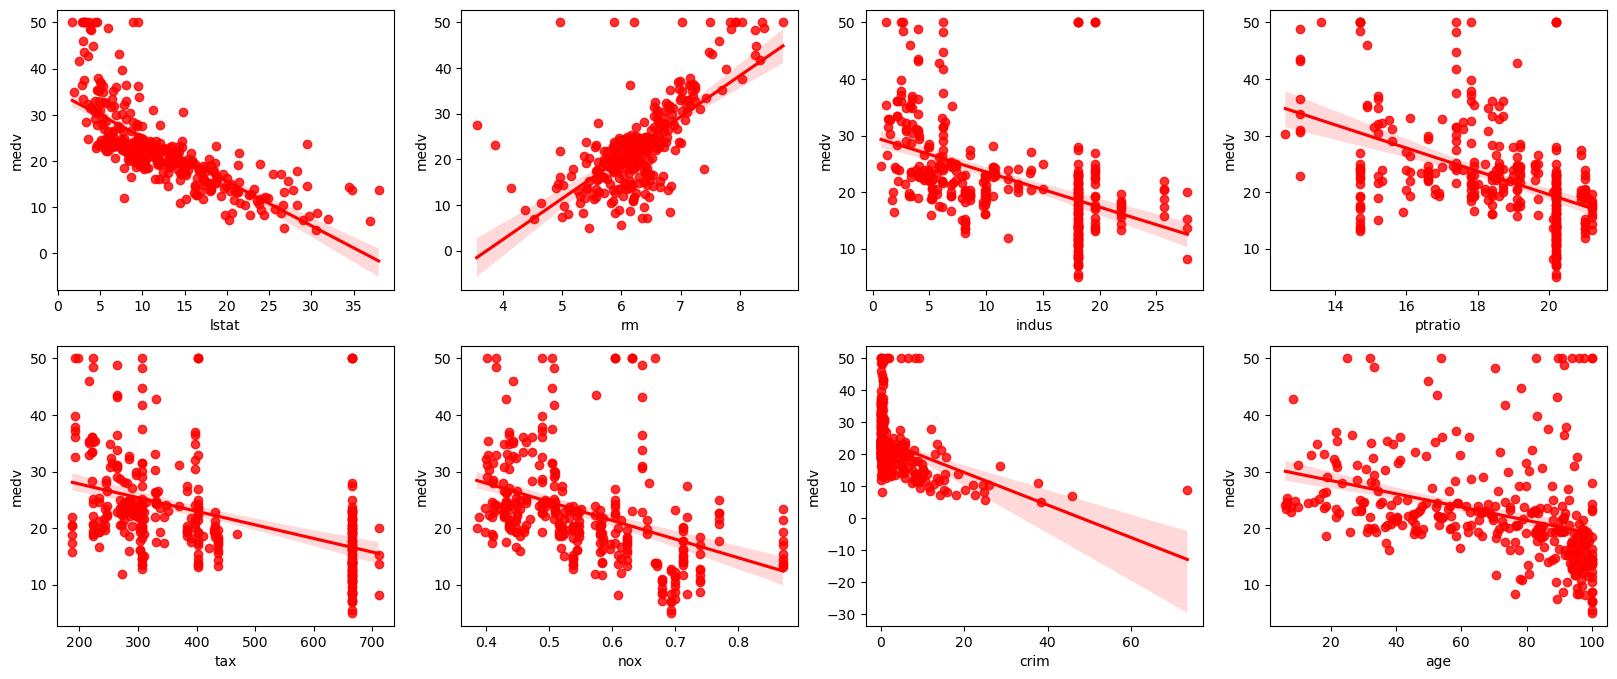

In [111]:
fig, axs = plt.subplots(nrows=2,ncols=4,figsize=(20,8))
cols = ['lstat','rm','indus','ptratio','tax','nox','crim','age']
for col,ax in zip(cols,axs.flat):
    sns.regplot(x=Train_DF[col],y=Train_DF['medv'],color = 'red',ax=ax)

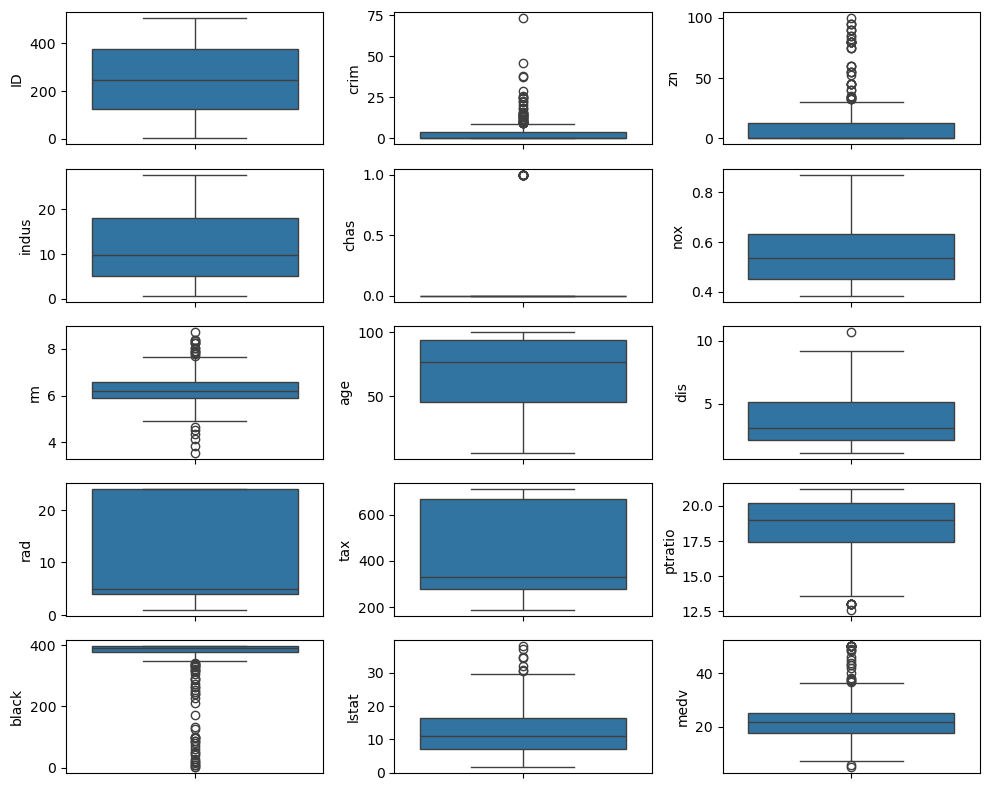

In [113]:
fig, axs = plt.subplots(nrows=5,ncols=3,figsize=(10,8))
index = 0
axs = axs.flatten()
for k,v in Train_DF.items():
    sns.boxplot(y=k,data=Train_DF,ax=axs[index])
    index+=1
plt.tight_layout()

In [115]:
Train_DF=Train_DF[~((Train_DF['crim']>=25))]
Train_DF=Train_DF[~((Train_DF['rm']>=8.5)|(Train_DF['rm']<4))]
Train_DF=Train_DF[~((Train_DF['lstat']>=30))]

In [117]:
X_DF = Train_DF[['lstat','rm','indus','ptratio','tax','nox','crim','age']]
X = X_DF.values
X

array([[4.980e+00, 6.575e+00, 2.310e+00, ..., 5.380e-01, 6.320e-03,
        6.520e+01],
       [9.140e+00, 6.421e+00, 7.070e+00, ..., 4.690e-01, 2.731e-02,
        7.890e+01],
       [2.940e+00, 6.998e+00, 2.180e+00, ..., 4.580e-01, 3.237e-02,
        4.580e+01],
       ...,
       [9.080e+00, 6.120e+00, 1.193e+01, ..., 5.730e-01, 4.527e-02,
        7.670e+01],
       [5.640e+00, 6.976e+00, 1.193e+01, ..., 5.730e-01, 6.076e-02,
        9.100e+01],
       [7.880e+00, 6.030e+00, 1.193e+01, ..., 5.730e-01, 4.741e-02,
        8.080e+01]])

In [119]:
Y_DF = Train_DF[['medv']]
Y = Y_DF.values
Y

array([[24. ],
       [21.6],
       [33.4],
       [36.2],
       [22.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [20.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [14.8],
       [12.7],
       [14.5],
       [13.5],
       [24.7],
       [30.8],
       [34.9],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [19.4],
       [19.7],
       [20.5],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [18.7],
       [16. ],
       [25. ],
       [33. ],
       [23.5],
       [19.4],
       [22. ],
       [17.4],
       [24.2],
       [22.8],
       [23.4],
       [24.1],
       [21.4],
       [20. ],
       [20.8],
       [28. ],
       [23.9],
       [22.9],
       [23.9],
       [26.6],
       [22.5],
       [22.2],
       [23.6],
       [28.7],
       [22.6],
       [25. ],
       [20.6],
       [21

In [121]:
LR = LinearRegression()
LR.fit(X,Y)

LinearRegression()

In [123]:
LinearRegression()

LinearRegression()

In [125]:
print("Intercept : ", LR.intercept_)
print("Slope : ", LR.coef_)

Intercept :  [12.16872968]
Slope :  [[-7.19484858e-01  5.34359785e+00  1.26504710e-01 -7.81817665e-01
  -2.89044912e-03 -2.60911011e+00  5.63687328e-02  1.86447916e-02]]


In [127]:
Y_pred = LR.predict(X)
print("Predicted Values :\n",Y_pred)

Predicted Values :
 [[31.00698907]
 [26.43136592]
 [32.12283589]
 [31.35814701]
 [23.44382329]
 [20.14812865]
 [23.12898016]
 [19.91236364]
 [21.52310353]
 [21.2933417 ]
 [20.65854697]
 [22.07498192]
 [15.96077695]
 [11.02912214]
 [18.12446737]
 [15.62005957]
 [13.16840899]
 [16.07880885]
 [10.5750719 ]
 [19.49432457]
 [14.32708137]
 [20.96788057]
 [28.93043018]
 [32.79489544]
 [26.12146498]
 [25.17227804]
 [23.51790757]
 [20.86222434]
 [18.57482066]
 [17.50861812]
 [16.65353076]
 [20.94377223]
 [24.96832625]
 [24.28734984]
 [15.45602697]
 [32.30789495]
 [27.38598675]
 [33.05388897]
 [23.86695316]
 [17.87214799]
 [18.65472247]
 [25.52769355]
 [29.37104078]
 [28.58041273]
 [22.13347621]
 [22.08003098]
 [17.26372657]
 [26.14915688]
 [25.15415654]
 [24.63866133]
 [25.63981653]
 [24.8832538 ]
 [23.21619217]
 [23.16063572]
 [28.77253665]
 [27.49501185]
 [24.42865993]
 [24.5042817 ]
 [28.16670086]
 [20.12064798]
 [24.08644301]
 [31.72513963]
 [31.53322073]
 [25.81374706]
 [27.11277104]
 [25.

In [129]:
RMSE = np.sqrt(mean_squared_error(Y,Y_pred))
print("Root Mean Square Error : ", RMSE)

Root Mean Square Error :  4.916284302163123


In [131]:
Test_DF = pd.read_csv(r"C:\Users\Nikhil\Downloads\test.csv")
Test_DF.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')

In [133]:
X_test = Test_DF[['lstat','rm','indus','ptratio','tax','nox','crim','age']].values
Y_test_pred = LR.predict(X_test)
for x, y in zip(Test_DF['ID'],Y_test_pred):
    print(x, y, sep='\t\t')

3		[33.85856388]
6		[27.69481744]
8		[20.01705336]
9		[9.44659407]
10		[20.40553285]
18		[17.51003005]
20		[18.31295909]
25		[16.21387453]
26		[14.17458613]
27		[16.61750091]
29		[21.79014061]
30		[23.21717856]
33		[7.9538319]
34		[13.58671836]
36		[21.81756194]
37		[19.95633294]
38		[21.53185882]
42		[29.96108933]
49		[5.67990036]
53		[29.28961304]
60		[21.33678643]
63		[26.33954371]
70		[21.84123223]
72		[21.64610633]
79		[22.30848147]
80		[22.40932351]
83		[25.44815008]
92		[26.33351513]
93		[27.4054216]
96		[28.20410204]
98		[38.01506739]
99		[36.41377436]
100		[32.84646915]
105		[20.21357106]
106		[15.67085348]
111		[19.21559717]
113		[18.51572554]
114		[18.89126578]
116		[18.83472569]
126		[21.41049371]
130		[14.21401783]
131		[22.77875668]
133		[23.37949168]
136		[18.98376141]
141		[12.84234145]
144		[12.02103385]
145		[6.82168615]
147		[19.79588876]
152		[20.98645504]
153		[19.48178784]
156		[23.52206157]
158		[36.09274837]
163		[42.65323497]
169		[28.11095763]
185		[18.2985838